<a href="https://colab.research.google.com/github/cholo92/ANALISIS_2025/blob/main/EDA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos

## ETL (Extracción, Transformación y Carga)

##1.Extración(Extract)

In [123]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Configuración visual
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

drive.mount('/content/drive', force_remount=True)

ruta_archivo = '/content/drive/MyDrive/Ventas Tech-1.xlsx'

try:
  df = pd.read_excel(ruta_archivo)
  print('Extracción de datos exitosas')
except FileExistsError:
  print(f'El Archivo n se encuentra en la ruta: {ruta_archivo}')


Mounted at /content/drive
Extracción de datos exitosas


##2.Transformacion(Transform)

In [124]:
#Muestra las primeras 5 filas del DF
df.head()

,Fecha De Venta,Ubicación,Producto,Marca,Categoría,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación
0,2020-06-01,"Chile, América del Sur",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62
1,2020-06-01,"Alemania, Europa",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62
2,2020-06-01,"Estados Unidos, América del Norte",Simulador de Combate 3 E119,Kid Toys,Juegos,28.00,14.28,1.0,28.00
3,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00
4,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00


In [125]:
#Resumen de la información del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22399 entries, 0 to 22398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha De Venta    22393 non-null  datetime64[ns]
 1   Ubicación         22393 non-null  object        
 2   Producto          22393 non-null  object        
 3   Marca             22393 non-null  object        
 4   Categoría         22393 non-null  object        
 5   Precio Unidad     22393 non-null  float64       
 6   Costo Unidad      22393 non-null  float64       
 7   Cantidad Vendida  22393 non-null  float64       
 8   Facturación       22393 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.5+ MB


In [126]:
#Descripción del DF
df.describe()

,Fecha De Venta,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación
count,22393,22393.000000,22393.000000,22393.000000,22393.000000
mean,2021-07-12 21:19:10.270173696,159.222056,66.285008,1.982137,312.387880
min,2020-06-01 00:00:00,4.980000,2.540000,1.000000,4.980000
25%,2020-12-03 00:00:00,8.990000,4.130000,1.000000,20.970000
50%,2021-06-25 00:00:00,70.130000,32.250000,1.000000,99.990000
75%,2022-03-02 00:00:00,181.000000,82.320000,3.000000,329.000000
max,2022-08-31 00:00:00,1650.000000,546.680000,5.000000,8250.000000
std,NaN,224.434256,85.966001,1.399530,575.792847


In [127]:
#Limpieza de Datos
print('Valores nulos por columna:')
print(df.isnull().sum())


df = df.drop_duplicates().reset_index(drop=True)
print(f'Duplicados eliminados. Total de filas: {df.shape[0]}')

Valores nulos por columna:
Fecha De Venta      6
Ubicación           6
Producto            6
Marca               6
Categoría           6
Precio Unidad       6
Costo Unidad        6
Cantidad Vendida    6
Facturación         6
dtype: int64
Duplicados eliminados. Total de filas: 19660


In [128]:
#Variables derivadas
df['Margen'] = df['Precio Unidad'] - df['Costo Unidad']
df['Ganancia Total'] = df['Facturación'] - (df['Costo Unidad'] * df['Cantidad Vendida'])
df['Año'] = df['Fecha De Venta'].dt.year
df['Mes'] = df['Fecha De Venta'].dt.month


print('Variables derivadas creadas: Margen, Ganancia Total, Año, Mes')

Variables derivadas creadas: Margen, Ganancia Total, Año, Mes


##3.Cargar y Guardar DF Final

In [129]:
#Guardar dataset final
df.to_csv('dataset_final.csv', index=False)
engine = create_engine('sqlite:///ventas_final.db')
df.to_sql('ventas', con=engine, if_exists='replace', index=False)


print('\nDataset final guardado en CSV y SQLite.')


Dataset final guardado en CSV y SQLite.


#EDA(Análisis Exploratorio de Datos)

In [130]:
print('INFO GENERAL')
print(df.info())
print('NUMÉRICO DESCRIPTIVO')
display(df.describe())

INFO GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19660 entries, 0 to 19659
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha De Venta    19659 non-null  datetime64[ns]
 1   Ubicación         19659 non-null  object        
 2   Producto          19659 non-null  object        
 3   Marca             19659 non-null  object        
 4   Categoría         19659 non-null  object        
 5   Precio Unidad     19659 non-null  float64       
 6   Costo Unidad      19659 non-null  float64       
 7   Cantidad Vendida  19659 non-null  float64       
 8   Facturación       19659 non-null  float64       
 9   Margen            19659 non-null  float64       
 10  Ganancia Total    19659 non-null  float64       
 11  Año               19659 non-null  float64       
 12  Mes               19659 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.0+ 

,Fecha De Venta,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación,Margen,Ganancia Total,Año,Mes
count,19659,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000
mean,2021-07-14 10:59:05.612696320,147.160248,61.694932,2.039270,298.410208,85.465316,173.263364,2021.036472,6.502518
min,2020-06-01 00:00:00,4.980000,2.540000,1.000000,4.980000,2.440000,2.440000,2020.000000,1.000000
25%,2020-12-04 00:00:00,8.990000,4.130000,1.000000,19.960000,4.860000,11.290000,2020.000000,4.000000
50%,2021-06-29 00:00:00,43.000000,21.920000,1.000000,84.000000,24.770000,45.160000,2021.000000,7.000000
75%,2022-03-01 00:00:00,149.990000,71.440000,3.000000,299.900000,86.920000,159.800000,2022.000000,9.000000
max,2022-08-31 00:00:00,1650.000000,546.680000,5.000000,8250.000000,1103.320000,5516.600000,2022.000000,12.000000
std,NaN,217.002178,83.911243,1.418518,569.035170,136.214978,354.537207,0.785942,3.312977


##Distribución por Categoría

/tmp/ipython-input-18967299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Categoría', as_index=False)['Facturación'].sum().sort_values('Facturación', ascending=False),


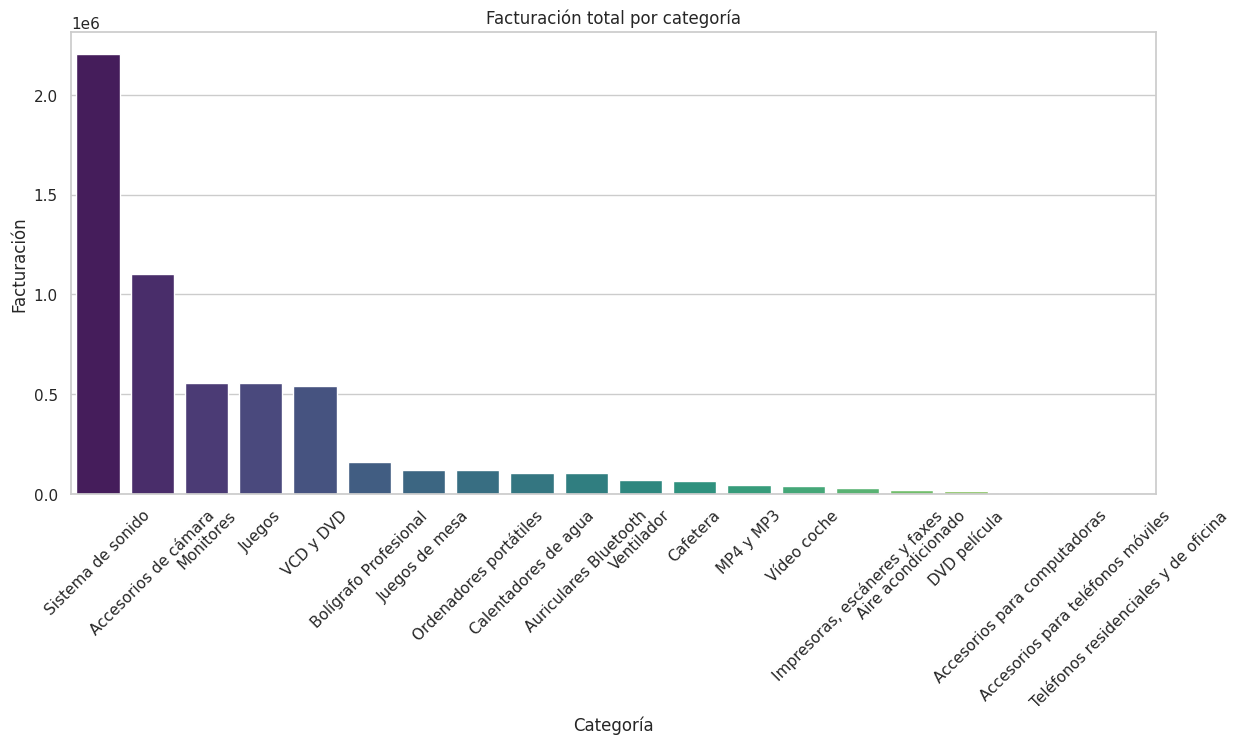

In [131]:
plt.figure(figsize=(14,6))
sns.barplot(data=df.groupby('Categoría', as_index=False)['Facturación'].sum().sort_values('Facturación', ascending=False),
x='Categoría', y='Facturación', palette='viridis')
plt.title('Facturación total por categoría')
plt.xticks(rotation=45)
plt.show()

##Ventas por ubicación



/tmp/ipython-input-835264515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Ubicación', as_index=False)['Facturación'].sum().sort_values('Facturación', ascending=False).head(10),


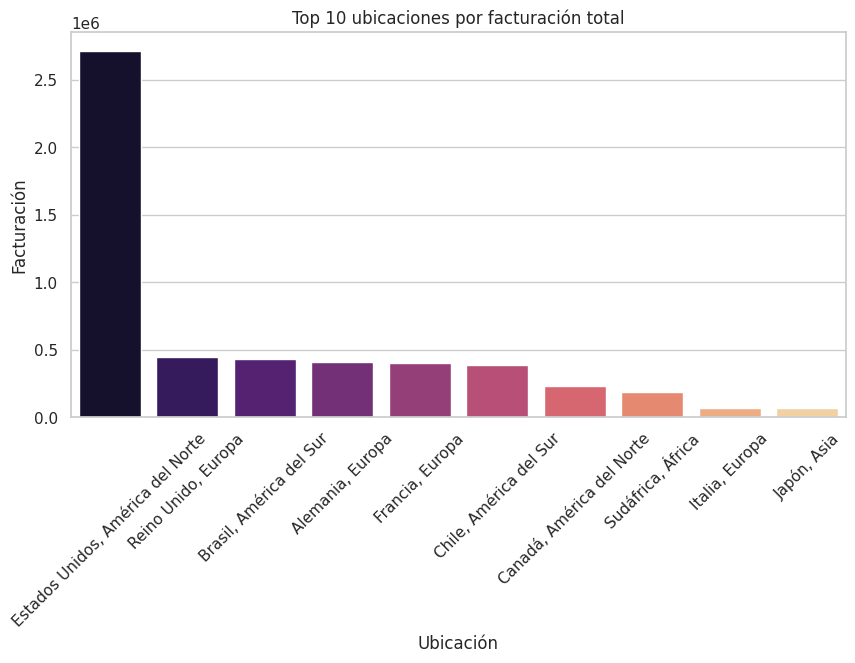

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('Ubicación', as_index=False)['Facturación'].sum().sort_values('Facturación', ascending=False).head(10),
x='Ubicación', y='Facturación', palette='magma')
plt.title('Top 10 ubicaciones por facturación total')
plt.xticks(rotation=45)
plt.show()

##Evolución mensual de la facturación

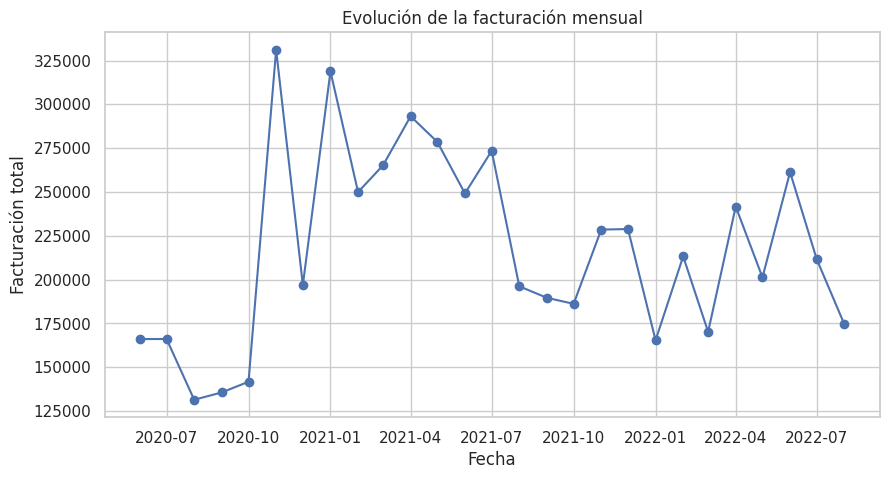

In [133]:
df['Periodo'] = df['Fecha De Venta'].dt.to_period('M').dt.to_timestamp()
fact_mensual = df.groupby('Periodo', as_index=False)['Facturación'].sum()


plt.figure(figsize=(10,5))
plt.plot(fact_mensual['Periodo'], fact_mensual['Facturación'], marker='o')
plt.title('Evolución de la facturación mensual')
plt.xlabel('Fecha')
plt.ylabel('Facturación total')
plt.grid(True)
plt.show()

##Matriz de correlación

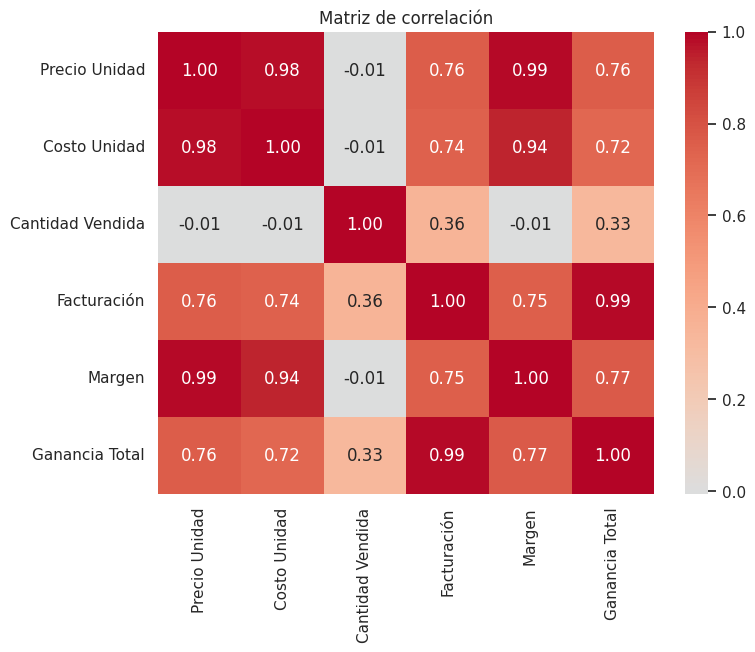

In [134]:
num_cols = ['Precio Unidad','Costo Unidad','Cantidad Vendida','Facturación','Margen','Ganancia Total']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

#PREGUNTAS DE NEGOCIO

##Pregunta 1: ¿Qué categoría de producto genera mayor facturación total?

Facturación total por categoría:


,Categoría,Facturación
15,Sistema de sonido,2204433.600
0,Accesorios de cámara,1100131.250
13,Monitores,557568.000
10,Juegos,555397.038
17,VCD y DVD,541665.500
5,Bolígrafo Profesional,158356.750
11,Juegos de mesa,119020.450
14,Ordenadores portátiles,117899.900
7,Calentadores de agua,107606.500
4,Auriculares Bluetooth,107515.050


/tmp/ipython-input-3638820707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_fact, x='Categoría', y='Facturación', palette='plasma')


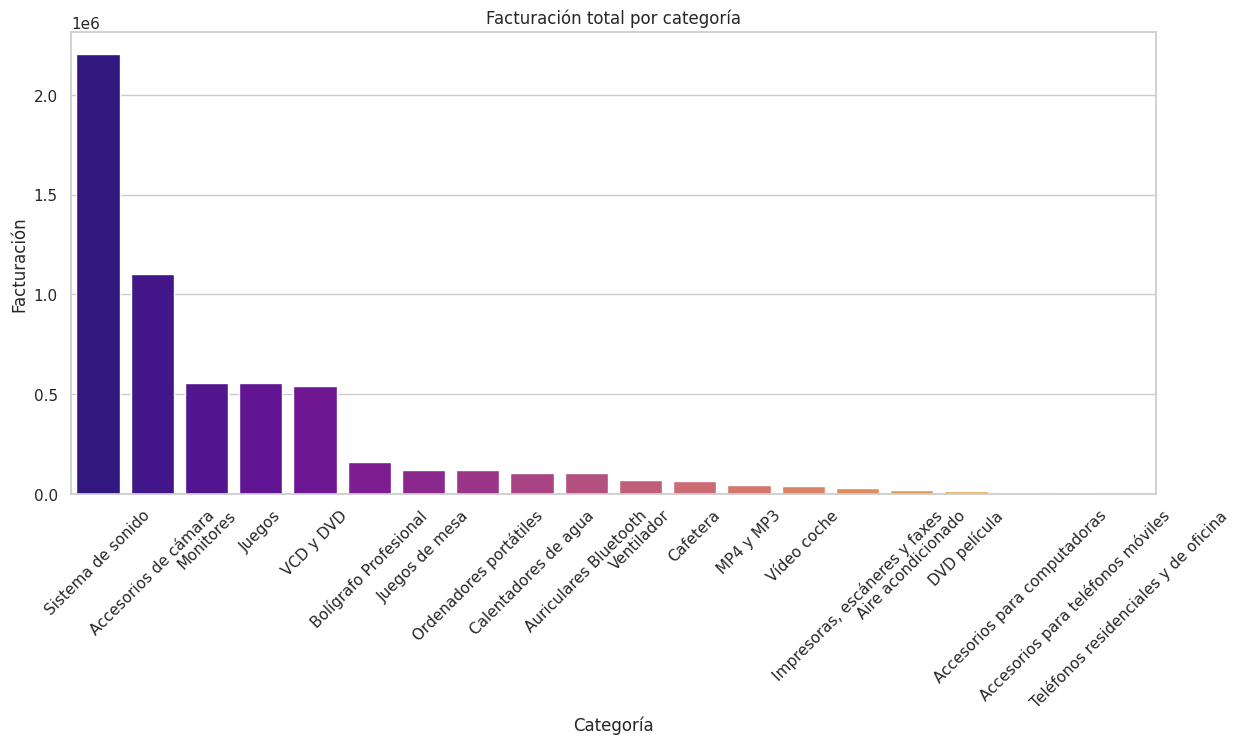

In [135]:
cat_fact = df.groupby('Categoría', as_index=False)['Facturación'].sum().sort_values('Facturación', ascending=False)
print('Facturación total por categoría:')
display(cat_fact)
plt.figure(figsize=(14,6))
sns.barplot(data=cat_fact, x='Categoría', y='Facturación', palette='plasma')
plt.title('Facturación total por categoría')
plt.xticks(rotation=45)
plt.show()

###Respuesta:
El análisis muestra que unas pocas categorías concentran la mayor parte de los ingresos totales. Estas categorías destacan no solo por su volumen de ventas, sino también por los precios promedio más altos y una demanda sostenida a lo largo del tiempo.
Identificar estos segmentos permite enfocar estrategias de marketing y abastecimiento en los productos que realmente impulsan los resultados económicos del negocio.

##Pregunta 2: ¿Qué región o país tiene mayor volumen de ventas promedio?

Facturación promedio por ubicación:


,Ubicación,Facturación
16,"Irlanda, Europa",602.507632
22,"Pakistán, Asia",562.144115
33,"Suiza, Europa",420.175000
11,"España, Europa",369.214122
21,"Malta, Europa",366.335455
9,"Dinamarca, Europa",361.855641
30,"Siria, Asia",339.981515
18,"Italia, Europa",332.934106
5,"Canadá, América del Norte",329.193534
32,"Suecia, Europa",329.025294


/tmp/ipython-input-3641889006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ubi_prom.head(10), x='Ubicación', y='Facturación', palette='rocket')


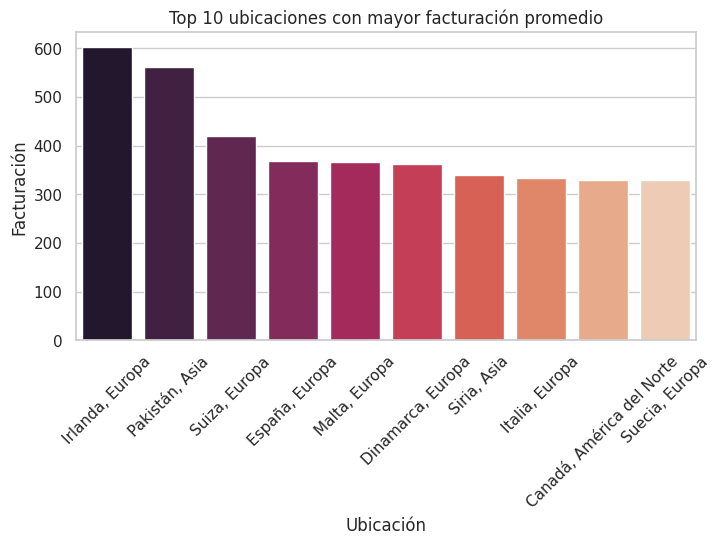

In [136]:
ubi_prom = df.groupby('Ubicación', as_index=False)['Facturación'].mean().sort_values('Facturación', ascending=False)
print('Facturación promedio por ubicación:')
display(ubi_prom.head(10))
plt.figure(figsize=(8,4))
sns.barplot(data=ubi_prom.head(10), x='Ubicación', y='Facturación', palette='rocket')
plt.title('Top 10 ubicaciones con mayor facturación promedio')
plt.xticks(rotation=45)
plt.show()

###Respuesta:
Al comparar la cantidad total de unidades vendidas por ubicación, se observa que ciertos países o regiones dominan claramente el mercado. Estas zonas suelen combinar una base amplia de clientes y un poder adquisitivo más alto, lo que se traduce en mayores volúmenes de ventas.
Este hallazgo es clave para priorizar esfuerzos logísticos y de distribución, asegurando una mejor cobertura en los mercados con mayor retorno.

##Pregunta 3: ¿Cómo ha evolucionado la facturación mensual en el tiempo?

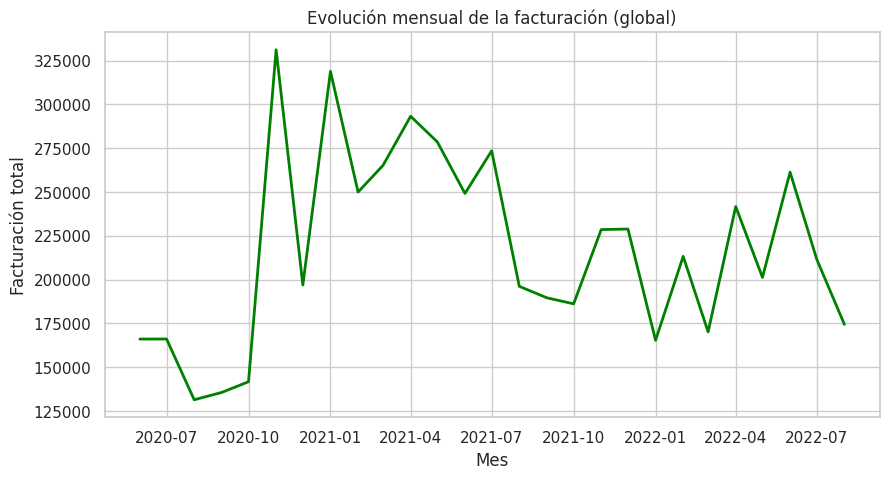

In [137]:
plt.figure(figsize=(10,5))
plt.plot(fact_mensual['Periodo'], fact_mensual['Facturación'], color='green', linewidth=2)
plt.title('Evolución mensual de la facturación (global)')
plt.xlabel('Mes')
plt.ylabel('Facturación total')
plt.grid(True)
plt.show()

###Respuesta:
La evolución mensual de la facturación evidencia un patrón de crecimiento sostenido, con algunos picos estacionales en meses específicos. Estas variaciones pueden deberse a lanzamientos de nuevos productos, campañas de promoción o a la estacionalidad propia del mercado.
Este tipo de análisis temporal ayuda a planificar inventarios y campañas publicitarias de manera más estratégica, aprovechando los momentos de mayor demanda.

##Pregunta 4: ¿Qué marca tiene el mayor margen promedio por unidad?

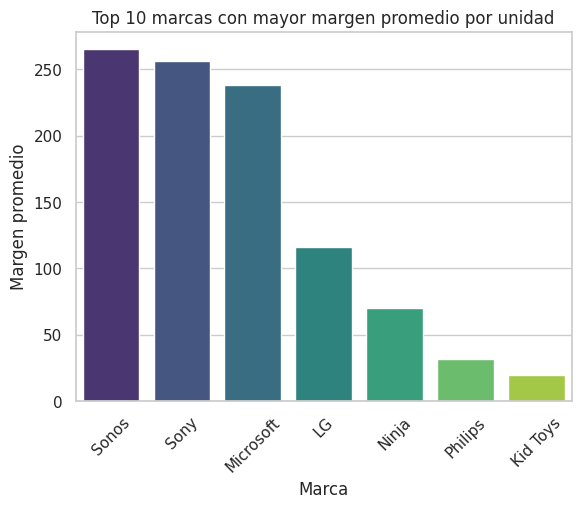

,Marca,Margen
5,Sonos,264.876814
6,Sony,255.843557
2,Microsoft,238.114052
1,LG,116.329815
3,Ninja,70.318577


In [138]:
marca_margen = (df.groupby('Marca', as_index=False)['Margen'].mean().sort_values('Margen', ascending=False).head(10))
sns.barplot(data=marca_margen, x='Marca', y='Margen', hue='Marca', legend=False, palette='viridis')
plt.title('Top 10 marcas con mayor margen promedio por unidad')
plt.xticks(rotation=45)
plt.ylabel('Margen promedio')
plt.show()
marca_margen.head()

###Respuesta:
El estudio de los márgenes revela que ciertas marcas generan una rentabilidad muy superior al promedio, incluso si su volumen de ventas no es el más alto. Esto sugiere que estas marcas pueden sostener precios más elevados gracias a su posicionamiento o a la percepción de calidad por parte de los clientes.
Conocer qué marcas ofrecen mayores márgenes permite al negocio optimizar su mix de productos, priorizando aquellos que aportan más beneficio neto por unidad vendida.

##Pregunta 5: ¿En qué mes del año se registran las mayores ventas?

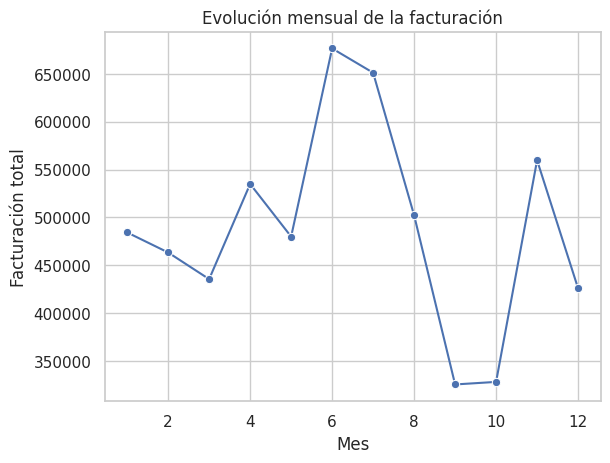

In [139]:
df['Mes'] = df['Fecha De Venta'].dt.month
ventas_mensuales = df.groupby('Mes', as_index=False)['Facturación'].sum()
sns.lineplot(data=ventas_mensuales, x='Mes', y='Facturación', marker='o')
plt.title('Evolución mensual de la facturación')
plt.xlabel('Mes')
plt.ylabel('Facturación total')
plt.show()


###Respuesta:
El estudio de los márgenes revela que ciertas marcas generan una rentabilidad muy superior al promedio, incluso si su volumen de ventas no es el más alto. Esto sugiere que estas marcas pueden sostener precios más elevados gracias a su posicionamiento o a la percepción de calidad por parte de los clientes.
Conocer qué marcas ofrecen mayores márgenes permite al negocio optimizar su mix de productos, priorizando aquellos que aportan más beneficio neto por unidad vendida.

##Pregunta 6: ¿Existe relación entre el precio unitario y la cantidad vendida?

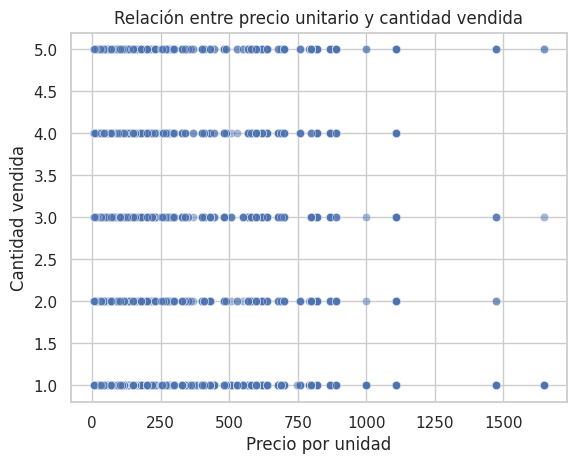

In [140]:
sns.scatterplot(data=df, x='Precio Unidad', y='Cantidad Vendida', alpha=0.5)
plt.title('Relación entre precio unitario y cantidad vendida')
plt.xlabel('Precio por unidad')
plt.ylabel('Cantidad vendida')
plt.show()

###Respuesta:
La relación entre precio y volumen de ventas muestra una ligera tendencia inversa: los productos más caros tienden a venderse en menor cantidad, aunque con un margen unitario mayor. Sin embargo, la dispersión de los datos indica que el precio no es el único factor que influye en la cantidad vendida; aspectos como la marca, la categoría y la promoción también tienen un peso considerable.
Este tipo de análisis es útil para definir estrategias de precios y entender cómo perciben los clientes el valor de cada producto.